In [1]:
import os
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
#train 讀取
df_train=pd.read_csv('train-v3.csv')
df_train

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5615100330,200000,2015,3,27,4,2.00,1900,8160,1,...,7,1900,0,1975,0,98022,47.2114,-121.986,1280,6532
1,8835900086,350000,2014,9,2,4,3.00,3380,16133,1,...,8,2330,1050,1959,0,98118,47.5501,-122.261,2500,11100
2,9510900270,254000,2014,12,11,3,2.00,2070,9000,1,...,7,1450,620,1969,0,98023,47.3085,-122.376,1630,7885
3,2621600015,175000,2015,4,30,3,1.00,1150,8924,1,...,6,1150,0,1943,0,98030,47.3865,-122.217,1492,8924
4,8078350090,619000,2015,3,31,3,2.50,2040,7503,2,...,8,2040,0,1987,0,98029,47.5718,-122.021,2170,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12962,9253900354,580000,2014,7,1,3,2.50,2200,11000,2,...,9,2200,0,1978,0,98008,47.5916,-122.112,2200,12851
12963,9510300130,598000,2014,6,28,4,2.50,3130,40918,2,...,9,3130,0,1994,0,98045,47.4761,-121.723,2760,35440
12964,1105000373,252500,2015,5,6,2,1.50,1110,986,2,...,7,950,160,2009,0,98118,47.5427,-122.272,1110,3515
12965,3629990280,497000,2014,6,23,3,2.25,1630,3817,2,...,7,1630,0,2005,0,98029,47.5485,-121.999,1630,3348


In [3]:
#validatio 讀取
df_val=pd.read_csv('valid-v3.csv')
df_val

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7504100590,725000,2015,3,25,4,2.25,3180,9600,2,...,10,3180,0,1984,0,98074,47.6313,-122.045,2840,10739
1,9272200090,1598890,2015,2,4,4,4.50,3780,6000,2,...,11,2770,1010,1910,1977,98116,47.5922,-122.388,2660,6000
2,6070800050,710000,2015,2,13,3,2.50,2330,9160,2,...,9,2330,0,1997,0,98006,47.5467,-122.181,2460,9160
3,2436700666,550700,2015,2,16,2,2.25,1190,1499,2,...,9,1100,90,2004,0,98105,47.6666,-122.285,1430,1332
4,9521101055,720000,2014,8,27,4,1.75,2530,5000,1,...,8,2070,460,1917,0,98103,47.6624,-122.348,1950,3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,6421100342,733000,2014,8,11,3,2.50,2160,9888,2,...,9,2160,0,1989,0,98052,47.6712,-122.142,3060,7829
2157,4254000220,475000,2015,3,7,4,2.50,2040,16200,2,...,8,2040,0,1997,0,98019,47.7366,-121.958,2530,15389
2158,8944310330,375000,2014,8,19,3,2.50,1520,5649,2,...,7,1520,0,1989,0,98034,47.7221,-122.162,1540,5000
2159,7215400770,260000,2014,6,23,4,2.50,2000,37045,2,...,8,2000,0,1989,0,98042,47.3398,-122.071,2390,36868


In [4]:
#test 讀取
df_test=pd.read_csv('test-v3.csv')
df_test

,id,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,2015,3,25,4,1.75,2360,6000,1,0,...,7,1280,1080,1955,0,98109,47.6465,-122.357,1700,3460
1,2,2015,5,1,3,2.75,3510,92347,2,0,...,10,3510,0,1990,0,98038,47.3735,-122.018,2970,37070
2,3,2014,8,29,2,1.00,1020,5000,1,0,...,7,1020,0,1916,0,98117,47.6781,-122.363,1480,5000
3,4,2015,2,13,2,2.50,1410,1281,2,0,...,8,1090,320,2008,0,98126,47.5659,-122.370,1410,2550
4,5,2014,11,19,3,2.50,2010,6857,1,0,...,9,1450,560,1955,0,98102,47.6402,-122.314,2380,6370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,6481,2015,5,1,3,2.50,3220,6409,2,0,...,9,3220,0,2008,0,98059,47.4815,-122.127,3330,6231
6481,6482,2014,12,18,2,1.00,750,6380,1,0,...,7,750,0,1949,0,98125,47.7033,-122.308,1690,6495
6482,6483,2014,9,5,3,1.00,980,7228,1,0,...,7,980,0,1946,0,98133,47.7294,-122.353,1070,7228
6483,6484,2014,7,16,2,1.00,2230,11472,2,0,...,7,2230,0,1951,0,98133,47.7372,-122.350,1870,8649


<AxesSubplot:>

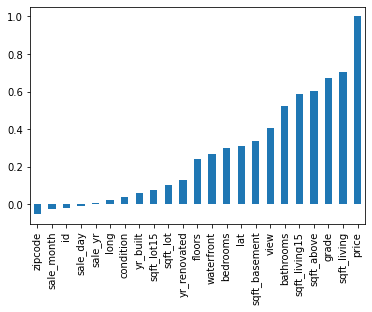

In [5]:
#觀察 成對相關性
corr = df_train.corr()
corr_price = corr['price']
corr_price.sort_values().plot.bar()

In [6]:
#發現sale的特徵 關聯性低 將其移除
#使用其他 18個特徵
k = 18 #number ofvariables for heatmap
cols = corr.nlargest(k, 'price')['price'].index
cols

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'lat', 'bedrooms', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long'],
      dtype='object')

In [7]:
del_cols = [i for i in list(df_train.columns) if i not in list(cols)]
del_cols

['id', 'sale_yr', 'sale_month', 'sale_day', 'zipcode']

In [8]:
#將df分成X和 y
X_train=df_train.drop(labels=del_cols,axis=1)
X_train=X_train.drop("price",axis=1)
y_train=df_train.price

X_val=df_val.drop(labels=del_cols,axis=1)
X_val=X_val.drop("price",axis=1)
y_val=df_val.price

X_test=df_test.drop(labels=del_cols,axis=1)

In [9]:
#正規化
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std

In [11]:
#建立DNN_model by keras
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(name='model-1')
model.add(layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1))
model.summary()

# 創建模型儲存目錄：
model_dir = 'lab2-logs/models/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# TensorBoard回調函數會幫忙紀錄訓練資訊，並存成TensorBoard的紀錄檔
log_dir = os.path.join('lab2-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# ModelCheckpoint回調函數幫忙儲存網路模型，可以設定只儲存最好的模型，「monitor」表示被監測的數據，「mode」min則代表監測數據越小越好。
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5',monitor='val_mean_absolute_error',save_best_only=True,mode='min')

# 設定訓練使用的優化器、損失函數和指標函數：
model.compile(keras.optimizers.Adam(0.001),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               9216      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33  

In [12]:
# 訓練網路模型：
history = model.fit(X_train, y_train,  # 傳入訓練數據
               batch_size=256,  # 批次大小設為256
               epochs=500,  # 整個dataset訓練500遍
               validation_data=(X_val, y_val),  # 驗證數據
               callbacks=[model_cbk, model_mckp]) 
 # Tensorboard回調函數紀錄訓練過程，ModelCheckpoint回調函數儲存最好的模型

Epoch 1/500
51/51 [==============================] - 1s 21ms/step - loss: 422288195584.0000 - mean_absolute_error: 536598.6875 - val_loss: 389868158976.0000 - val_mean_absolute_error: 523719.1250
Epoch 2/500
51/51 [==============================] - 0s 8ms/step - loss: 282874019840.0000 - mean_absolute_error: 416669.6562 - val_loss: 74460921856.0000 - val_mean_absolute_error: 198929.7812
Epoch 3/500
51/51 [==============================] - 0s 8ms/step - loss: 67084767232.0000 - mean_absolute_error: 181380.3594 - val_loss: 51296804864.0000 - val_mean_absolute_error: 162043.3438
Epoch 4/500
51/51 [==============================] - ETA: 0s - loss: 51148599296.0000 - mean_absolute_error: 154709.68 - 0s 7ms/step - loss: 51058794496.0000 - mean_absolute_error: 154606.4219 - val_loss: 43037679616.0000 - val_mean_absolute_error: 142330.0625
Epoch 5/500
51/51 [==============================] - 0s 7ms/step - loss: 43890036736.0000 - mean_absolute_error: 137939.8594 - val_loss: 37762596864.0000 - 

51/51 [==============================] - 0s 6ms/step - loss: 30339262464.0000 - mean_absolute_error: 106163.2188 - val_loss: 26343561216.0000 - val_mean_absolute_error: 102215.4375
Epoch 43/500
51/51 [==============================] - 0s 6ms/step - loss: 29999249408.0000 - mean_absolute_error: 106079.5547 - val_loss: 26096842752.0000 - val_mean_absolute_error: 102075.6250
Epoch 44/500
51/51 [==============================] - 0s 6ms/step - loss: 30048833536.0000 - mean_absolute_error: 105850.9141 - val_loss: 26202261504.0000 - val_mean_absolute_error: 103055.6172
Epoch 45/500
51/51 [==============================] - 0s 6ms/step - loss: 30679914496.0000 - mean_absolute_error: 106990.4688 - val_loss: 25771292672.0000 - val_mean_absolute_error: 101363.8516
Epoch 46/500
51/51 [==============================] - 0s 7ms/step - loss: 30041675776.0000 - mean_absolute_error: 106779.9141 - val_loss: 25654910976.0000 - val_mean_absolute_error: 100649.6953
Epoch 47/500
51/51 [=======================

51/51 [==============================] - 0s 7ms/step - loss: 26598430720.0000 - mean_absolute_error: 98884.6250 - val_loss: 21721253888.0000 - val_mean_absolute_error: 92384.4766
Epoch 85/500
51/51 [==============================] - 0s 6ms/step - loss: 26250491904.0000 - mean_absolute_error: 98435.5547 - val_loss: 21909714944.0000 - val_mean_absolute_error: 93171.9141
Epoch 86/500
51/51 [==============================] - 0s 7ms/step - loss: 25962117120.0000 - mean_absolute_error: 98136.0391 - val_loss: 21580380160.0000 - val_mean_absolute_error: 92488.3359
Epoch 87/500
51/51 [==============================] - 0s 6ms/step - loss: 25790062592.0000 - mean_absolute_error: 97423.1094 - val_loss: 21542475776.0000 - val_mean_absolute_error: 92803.0078
Epoch 88/500
51/51 [==============================] - 0s 6ms/step - loss: 25409357824.0000 - mean_absolute_error: 96945.7891 - val_loss: 20662444032.0000 - val_mean_absolute_error: 89774.4531
Epoch 89/500
51/51 [==============================] -

51/51 [==============================] - 0s 6ms/step - loss: 19759998976.0000 - mean_absolute_error: 85791.2422 - val_loss: 14379072512.0000 - val_mean_absolute_error: 72877.3828
Epoch 127/500
51/51 [==============================] - 0s 7ms/step - loss: 19832158208.0000 - mean_absolute_error: 84933.2578 - val_loss: 14474133504.0000 - val_mean_absolute_error: 75937.0781
Epoch 128/500
51/51 [==============================] - 0s 6ms/step - loss: 19747268608.0000 - mean_absolute_error: 85957.5859 - val_loss: 14395603968.0000 - val_mean_absolute_error: 72227.1719
Epoch 129/500
51/51 [==============================] - 0s 7ms/step - loss: 19593975808.0000 - mean_absolute_error: 85422.1953 - val_loss: 15020684288.0000 - val_mean_absolute_error: 74373.8594
Epoch 130/500
51/51 [==============================] - 0s 6ms/step - loss: 19693922304.0000 - mean_absolute_error: 85941.3516 - val_loss: 13919771648.0000 - val_mean_absolute_error: 72374.4453
Epoch 131/500
51/51 [============================

51/51 [==============================] - 0s 10ms/step - loss: 16235300864.0000 - mean_absolute_error: 79278.5000 - val_loss: 12585639936.0000 - val_mean_absolute_error: 68420.7188
Epoch 169/500
51/51 [==============================] - 0s 6ms/step - loss: 15861177344.0000 - mean_absolute_error: 78477.5312 - val_loss: 12731365376.0000 - val_mean_absolute_error: 68504.4766
Epoch 170/500
51/51 [==============================] - 0s 7ms/step - loss: 15871591424.0000 - mean_absolute_error: 79449.0547 - val_loss: 12316264448.0000 - val_mean_absolute_error: 68559.9922
Epoch 171/500
51/51 [==============================] - 0s 7ms/step - loss: 15781246976.0000 - mean_absolute_error: 78108.3828 - val_loss: 12277190656.0000 - val_mean_absolute_error: 68345.7969
Epoch 172/500
51/51 [==============================] - 0s 8ms/step - loss: 15343304704.0000 - mean_absolute_error: 77801.3359 - val_loss: 12700425216.0000 - val_mean_absolute_error: 69657.2656
Epoch 173/500
51/51 [===========================

51/51 [==============================] - 0s 6ms/step - loss: 13546567680.0000 - mean_absolute_error: 73972.2422 - val_loss: 12672768000.0000 - val_mean_absolute_error: 68014.7422
Epoch 211/500
51/51 [==============================] - 0s 6ms/step - loss: 13335489536.0000 - mean_absolute_error: 73654.1797 - val_loss: 12356243456.0000 - val_mean_absolute_error: 67388.9375
Epoch 212/500
51/51 [==============================] - 0s 6ms/step - loss: 13008984064.0000 - mean_absolute_error: 73865.3516 - val_loss: 12435202048.0000 - val_mean_absolute_error: 68416.2109
Epoch 213/500
51/51 [==============================] - 0s 6ms/step - loss: 13642272768.0000 - mean_absolute_error: 75293.3125 - val_loss: 12915458048.0000 - val_mean_absolute_error: 69544.2109
Epoch 214/500
51/51 [==============================] - 0s 6ms/step - loss: 13942024192.0000 - mean_absolute_error: 74879.5391 - val_loss: 12375031808.0000 - val_mean_absolute_error: 66906.4844
Epoch 215/500
51/51 [============================

51/51 [==============================] - 1s 10ms/step - loss: 12136193024.0000 - mean_absolute_error: 70816.2500 - val_loss: 11989408768.0000 - val_mean_absolute_error: 65746.6016
Epoch 253/500
51/51 [==============================] - 0s 7ms/step - loss: 11912862720.0000 - mean_absolute_error: 70313.3828 - val_loss: 12026706944.0000 - val_mean_absolute_error: 66800.0312
Epoch 254/500
51/51 [==============================] - 0s 6ms/step - loss: 12376341504.0000 - mean_absolute_error: 70928.5547 - val_loss: 11704813568.0000 - val_mean_absolute_error: 65559.8984
Epoch 255/500
51/51 [==============================] - 0s 7ms/step - loss: 12193209344.0000 - mean_absolute_error: 70970.0703 - val_loss: 12111749120.0000 - val_mean_absolute_error: 66695.3984
Epoch 256/500
51/51 [==============================] - 0s 7ms/step - loss: 11897249792.0000 - mean_absolute_error: 70340.3203 - val_loss: 12243067904.0000 - val_mean_absolute_error: 66355.1641
Epoch 257/500
51/51 [===========================

51/51 [==============================] - 0s 7ms/step - loss: 11264747520.0000 - mean_absolute_error: 68769.2656 - val_loss: 12356766720.0000 - val_mean_absolute_error: 65879.5781
Epoch 295/500
51/51 [==============================] - 0s 6ms/step - loss: 11670490112.0000 - mean_absolute_error: 68994.7578 - val_loss: 12803958784.0000 - val_mean_absolute_error: 66743.7891
Epoch 296/500
51/51 [==============================] - 0s 7ms/step - loss: 11758468096.0000 - mean_absolute_error: 68931.6953 - val_loss: 12370233344.0000 - val_mean_absolute_error: 66053.7500
Epoch 297/500
51/51 [==============================] - 0s 6ms/step - loss: 11102776320.0000 - mean_absolute_error: 68462.9297 - val_loss: 12699025408.0000 - val_mean_absolute_error: 66225.8906
Epoch 298/500
51/51 [==============================] - 0s 7ms/step - loss: 10947117056.0000 - mean_absolute_error: 67943.5625 - val_loss: 12618405888.0000 - val_mean_absolute_error: 67423.7344
Epoch 299/500
51/51 [============================

51/51 [==============================] - 0s 7ms/step - loss: 10358223872.0000 - mean_absolute_error: 66889.7891 - val_loss: 12721180672.0000 - val_mean_absolute_error: 65746.7578
Epoch 337/500
51/51 [==============================] - 0s 7ms/step - loss: 10307464192.0000 - mean_absolute_error: 66492.3047 - val_loss: 12346998784.0000 - val_mean_absolute_error: 65432.0273
Epoch 338/500
51/51 [==============================] - 0s 6ms/step - loss: 10784964608.0000 - mean_absolute_error: 67435.1016 - val_loss: 11878552576.0000 - val_mean_absolute_error: 65681.1641
Epoch 339/500
51/51 [==============================] - 0s 7ms/step - loss: 10554579968.0000 - mean_absolute_error: 66864.3281 - val_loss: 12520613888.0000 - val_mean_absolute_error: 66479.7266
Epoch 340/500
51/51 [==============================] - 0s 7ms/step - loss: 10865043456.0000 - mean_absolute_error: 67539.5703 - val_loss: 12304654336.0000 - val_mean_absolute_error: 65603.2109
Epoch 341/500
51/51 [============================

51/51 [==============================] - 0s 6ms/step - loss: 10581777408.0000 - mean_absolute_error: 67260.8281 - val_loss: 12226479104.0000 - val_mean_absolute_error: 65345.3984
Epoch 379/500
51/51 [==============================] - 0s 6ms/step - loss: 10110010368.0000 - mean_absolute_error: 65528.9062 - val_loss: 12155161600.0000 - val_mean_absolute_error: 65772.1797
Epoch 380/500
51/51 [==============================] - 0s 7ms/step - loss: 9482896384.0000 - mean_absolute_error: 64565.0977 - val_loss: 11961111552.0000 - val_mean_absolute_error: 65428.1836
Epoch 381/500
51/51 [==============================] - 0s 7ms/step - loss: 9754926080.0000 - mean_absolute_error: 65126.0352 - val_loss: 12204312576.0000 - val_mean_absolute_error: 65344.2656
Epoch 382/500
51/51 [==============================] - 0s 6ms/step - loss: 10293669888.0000 - mean_absolute_error: 65454.6055 - val_loss: 12175673344.0000 - val_mean_absolute_error: 65234.5312
Epoch 383/500
51/51 [==============================

Epoch 421/500
51/51 [==============================] - 0s 8ms/step - loss: 9525783552.0000 - mean_absolute_error: 64640.9688 - val_loss: 12601252864.0000 - val_mean_absolute_error: 66000.6719
Epoch 422/500
51/51 [==============================] - 0s 7ms/step - loss: 9555561472.0000 - mean_absolute_error: 64390.8789 - val_loss: 12653705216.0000 - val_mean_absolute_error: 67524.9688
Epoch 423/500
51/51 [==============================] - 0s 7ms/step - loss: 9474193408.0000 - mean_absolute_error: 64360.7305 - val_loss: 12076377088.0000 - val_mean_absolute_error: 65479.8711
Epoch 424/500
51/51 [==============================] - 0s 7ms/step - loss: 9161924608.0000 - mean_absolute_error: 63134.3438 - val_loss: 12628765696.0000 - val_mean_absolute_error: 65554.4844
Epoch 425/500
51/51 [==============================] - 0s 7ms/step - loss: 9453692928.0000 - mean_absolute_error: 64265.1523 - val_loss: 12607934464.0000 - val_mean_absolute_error: 65732.7109
Epoch 426/500
51/51 [===================

Epoch 464/500
51/51 [==============================] - 0s 6ms/step - loss: 9443247104.0000 - mean_absolute_error: 63505.6289 - val_loss: 12351233024.0000 - val_mean_absolute_error: 66117.2656
Epoch 465/500
51/51 [==============================] - 0s 6ms/step - loss: 9068218368.0000 - mean_absolute_error: 63089.6914 - val_loss: 12778050560.0000 - val_mean_absolute_error: 66625.5234
Epoch 466/500
51/51 [==============================] - 0s 8ms/step - loss: 9373835264.0000 - mean_absolute_error: 63258.0273 - val_loss: 12584185856.0000 - val_mean_absolute_error: 65987.8203
Epoch 467/500
51/51 [==============================] - 0s 7ms/step - loss: 9392198656.0000 - mean_absolute_error: 63941.5820 - val_loss: 13459295232.0000 - val_mean_absolute_error: 69264.9141
Epoch 468/500
51/51 [==============================] - 0s 8ms/step - loss: 9252830208.0000 - mean_absolute_error: 63446.3828 - val_loss: 12649942016.0000 - val_mean_absolute_error: 65767.8594
Epoch 469/500
51/51 [===================

In [13]:
history.history.keys() # 查看history儲存的資訊有哪些

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

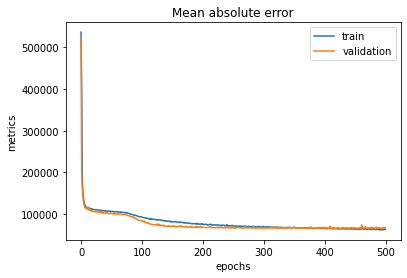

In [14]:
#Mean absolute error
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.title('Mean absolute error')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='upper right')

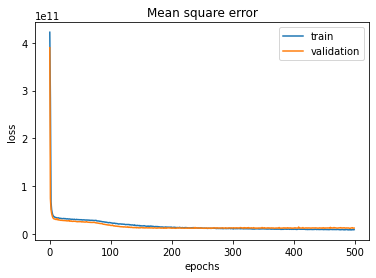

In [15]:
#Mean square error
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Mean square error')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

In [16]:
#載入訓練好的模型
model = keras.models.load_model('lab2-logs/models/Best-model-1.h5')
#對test進行預測
predict_test=model.predict(X_test)
predict_test=predict_test.astype('int')
predict_test

array([[615048],
       [670106],
       [500858],
       ...,
       [318839],
       [435423],
       [208070]])

In [17]:
#讀取繳交格式 
submit=pd.read_csv('sampleSubmission.csv')
#更改預測結果
submit['price']=predict_test
submit

,id,price
0,1,615048
1,2,670106
2,3,500858
3,4,373794
4,5,890072
...,...,...
6480,6481,585717
6481,6482,339388
6482,6483,318839
6483,6484,435423


In [18]:
#輸出test的預測檔案
submit.to_csv('submit2.csv',index=False)